<a href="https://colab.research.google.com/github/SaurabhSRP/Missing_Values/blob/main/Missing_values_(Categorical_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1st Technique - Frequent Category Imputation**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/House price prediction/train (2).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalesPrice'])

In [ ]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [ ]:
#percentage of null values
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

###Compute the Frequency with every feature

In [ ]:
##BsmtQual and GarageType have very less missing values , we will use 1st technique 
##byreplacing it with more frequent category wont distort the relation
df.groupby(['BsmtQual'])['BsmtQual'].count()
## we will use TA as its more frequent

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

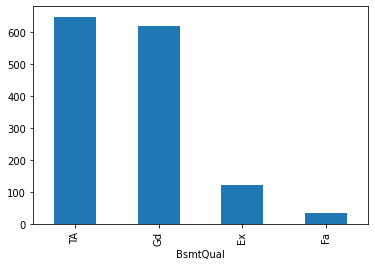

In [ ]:
##lets see using Plots
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [ ]:
 ##similarly for GarageType
 df.groupby(['GarageType'])['GarageType'].count()
## we will use Attchd feature as it is frequent


GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageType, dtype: int64

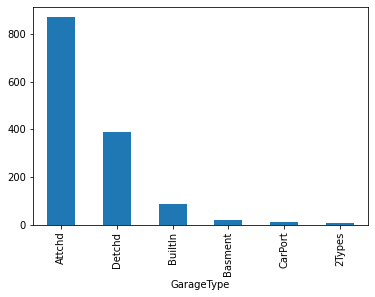

In [ ]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [ ]:
##now lets see how we use it 
df['GarageType'].value_counts()
##gives all the values

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
##now we want to see all the categories names in it 
df['GarageType'].value_counts().index
#we get all th

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [ ]:
##as its a list we can use indexing 
df['GarageType'].value_counts().index[0]

'Attchd'

In [ ]:
##impute function
def impute_nan(df,variable):
  #find the most freq category
  most_frequent_category=df[variable].value_counts().index[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
impute_nan(df,'GarageType')

In [ ]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [ ]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,features)

In [ ]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [ ]:
###alterative also 
df['GarageType'].mode()[0]

'Attchd'

##Advantage
####1) Easy to implement
####2) Faster way to implement


##Disadvantage
####1) It will distort the relationship of the most frequent labels,so not to use for more missing values 
####2) Since we are using more Frequent labels, it may use them in an over represented way if there are many null values

#**2nd Technique - Adding a variable to capture NaN**

In [ ]:
dff=pd.read_csv("/content/drive/MyDrive/datasets/House price prediction/train (2).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
dff.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
## add another variable wrt to features
dff['BsmtQual_Var']=np.where(dff['BsmtQual'].isnull(),1,0)


In [ ]:
dff.head()
##we can see new feature is added in zeros and ones
##but we need to create a new column

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
#we will find the most freq feature
frequent=dff['BsmtQual'].mode()[0]
frequent

'TA'

In [ ]:
##replace all nan with mode and also creating a new variable with new feature
dff['BsmtQual'].fillna(frequent,inplace=True)
#works well for high nan values ex='fireplaceQu'

In [ ]:
dff.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


###Disadvantage
####1) it increases the feature space 

In [ ]:
dff['FireplaceQu_var']=np.where(dff['FireplaceQu'].isnull(),1,0)
freq=dff['FireplaceQu'].mode()[0]
dff['FireplaceQu'].fillna(freq,inplace=True)

In [ ]:
dff.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


###Sub step or technique
######one more important step or technique
#####suppose if you have more freq categories we replace , we just replace nan with a new category


In [ ]:
dff1=pd.read_csv("/content/drive/MyDrive/datasets/House price prediction/train (2).csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
dff1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan2(df,variable):
  df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])


In [ ]:
for feat in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan2(dff1,feat)

In [ ]:
dff1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
##now we will drop the old category and keep the new ones 
dff1=dff1.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [ ]:
dff1.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
